Name:Meghashyam Shenoy
Batch:B4
Section:IV Sem B section
Reg no:220968352

In [4]:
import pandas as pd
import matplotlib.pyplot as mlt

import numpy as np
import seaborn as sns

In [8]:
df=pd.read_csv("diabetes.csv")

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [10]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [11]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [26]:
df1=df.subtract(df['Outcome'],axis=0)
X=df1
y=df['Outcome']

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import jaccard_score
from sklearn.linear_model import LogisticRegression
X_TRAIN,X_TEST,y_TRAIN,y_TEST=train_test_split(X,y,test_size=0.2)
X_TRAIN.shape


(614, 9)

In [115]:
m=LogisticRegression(C=100,solver="lbfgs")

In [116]:
y_TEST.shape

(154,)

In [117]:
m.fit(X_TRAIN,y_TRAIN)

C:\Users\Asus\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=100)

In [118]:
Y_PRED=m.predict(X_TEST)

In [119]:
Y_PRED

array([1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1],
      dtype=int64)

In [120]:
print(jaccard_score(y_TEST,Y_PRED))

0.8833333333333333


Fine tuned the model from a jaccard score of 0.83 to 0.883 by Adjucting the value of 'C' and using lbfgs solver. 

<Axes: >

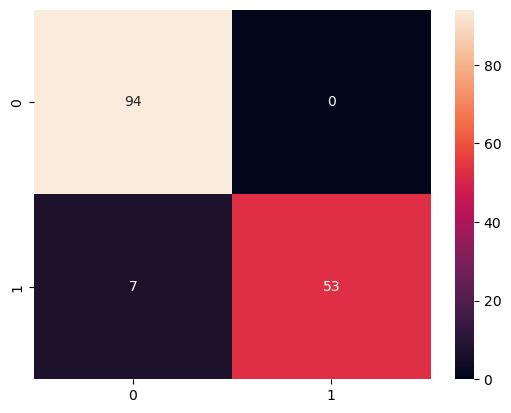

In [130]:
from sklearn.metrics import confusion_matrix,precision_score,accuracy_score,recall_score
cm=confusion_matrix(y_TEST,Y_PRED)
sns.heatmap(cm,annot=True)

precision and recall for class 0(non diabetic):

In [135]:
r=recall_score(y_TEST,Y_PRED,average=None)
p=precision_score(y_TEST,Y_PRED,average=None)
print(p[0])
print(r[0])

0.9306930693069307
1.0


precision and recall for class 1( diabetic):


In [136]:
print(p[1])
print(r[1])

1.0
0.8833333333333333


Overall Acuuracy

In [128]:
print(accuracy_score(y_TEST,Y_PRED,))

0.9545454545454546
